In [2]:
# %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

pyber_new=pd.merge(city_data_df,ride_data_df,on="city")
pyber_new.head()

# Display the data table for preview




,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [3]:
#Find average fare ($) per city (find the mean)
average_fare=pyber_new.groupby("city")["fare"].mean()
average_fare


city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

In [4]:
#Total Number of Rides Per City
total_rides=pyber_new.groupby("city")["ride_id"].count()
total_rides

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

In [5]:
#Total Number of Drivers Per City
total_drivers=pyber_new.groupby("city")["driver_count"].sum()
total_drivers

city
Amandaburgh              216
Barajasview              572
Barronchester            176
Bethanyland              396
Bradshawfurt              70
Brandonfort              190
Carriemouth             1404
Christopherfurt         1107
Colemanland              506
Davidfurt                391
Deanville                931
East Aaronbury            63
East Danielview          374
East Kaylahaven         1885
East Kentstad            260
East Marymouth           135
Erikaland                444
Garzaport                 21
Grahamburgh             1525
Grayville                 30
Harringtonfort            24
Huntermouth              888
Hurleymouth             1008
Jerryton                1600
Jessicaport                6
Johnton                  567
Joneschester             975
Josephside               675
Justinberg              1170
Karenberg                374
                        ... 
South Evanton            341
South Jack               874
South Jennifer            49
South Kar

In [6]:
#Calculate the City Type (Urban, Suburban, Rural)
city_type = city_data_df.set_index('city')['type']
city_type.value_counts()


Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [7]:
#New dataframe showing calculated fields
citiesnew=pd.DataFrame({"Average Fare Per City": average_fare, 
                           "Number of Rides": total_rides,
                           "Number of Drivers":total_drivers,
                          "City":city_type})
citiesnew.head()


,Average Fare Per City,Number of Rides,Number of Drivers,City
Amandaburgh,24.641667,18,216,Urban
Barajasview,25.332273,22,572,Urban
Barronchester,36.422500,16,176,Suburban
Bethanyland,32.956111,18,396,Suburban
Bradshawfurt,40.064000,10,70,Rural


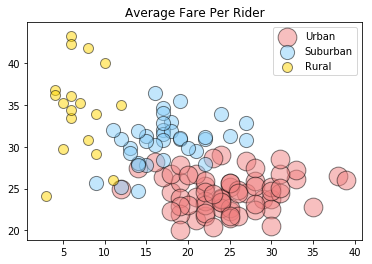

In [8]:
# Obtain the x and y coordinates for each of the three city types
Urban = citiesnew.loc[citiesnew["City"]=="Urban"]
Suburban = citiesnew.loc[citiesnew["City"]=="Suburban"]
Rural = citiesnew.loc[citiesnew["City"]=="Rural"]

# Build the scatter plots for each city types
plt.scatter(Urban["Number of Rides"],Urban["Average Fare Per City"],label = "Urban",color="lightcoral", s=350, alpha=.5, edgecolors="black",linewidths=1)
plt.scatter(Suburban["Number of Rides"],Suburban["Average Fare Per City"],label = "Suburban",color="lightskyblue",s=200, alpha=.5, edgecolors="black",linewidths=1)
plt.scatter(Rural["Number of Rides"],Rural["Average Fare Per City"],label = "Rural",color="Gold",s=100, alpha=.5, edgecolors="black",linewidths=1)

#label the axis
plt.xlabel=("Total Number of Rides (Per City)")
plt.ylabel=("Average Fare ($)")
plt.title("Average Fare Per Rider")
plt.legend(loc="best")
plt.show()

# Create a legend
#TA HELP! I have a legend and labels created above but they are not appearing. When I remove the "=" I get an error.
# I have tried LOC="upper right", as well as numerous formats with and without the equal sign, also using specific lables of "city type"

#referring to instructions:
#You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
 

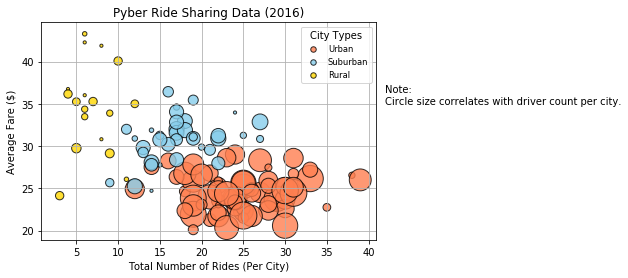

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [9]:
# find % of total fares by city type
total_fare=pyber_new.groupby("type")["fare"].sum()
total_fare


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [52]:
total_fare.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

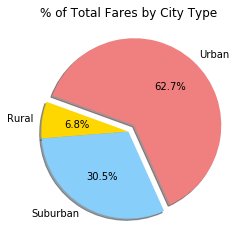

In [10]:
#identify the colors
colors=["gold","lightskyblue","lightcoral"]

# Build Pie Chart
plt.pie(total_fare, 
        autopct="%1.1f%%", 
        labels= total_fare.index, 
        colors=colors,
        startangle=160,
        shadow=True, 
        explode=(0,0,0.1))
plt.title("% of Total Fares by City Type")
plt.show()


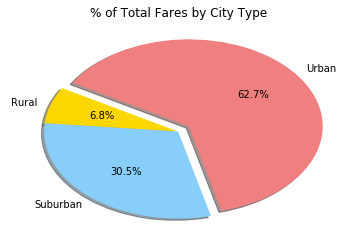

In [4]:
# Show Figure


## Total Rides by City Type

In [11]:
# find % of total rides by city type
number_of_rides_pie=pyber_new.groupby("type")["ride_id"].count()
number_of_rides_pie


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [12]:
number_of_rides_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

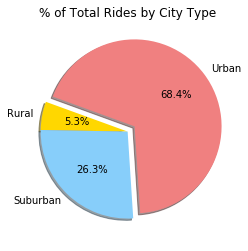

In [13]:
#identify the colors
colors=["gold","lightskyblue","lightcoral"]

# Build Pie Chart
plt.pie(number_of_rides_pie, 
        autopct="%1.1f%%", 
        labels= number_of_rides_pie.index, 
        colors=colors,
        startangle=160,
        shadow=True, 
        explode=(0,0,0.1))
plt.title("% of Total Rides by City Type")
plt.show()


In [14]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [15]:
# find % of total drivers by city type
total_drivers_pie=pyber_new.groupby("type")["driver_count"].sum()
total_drivers_pie

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [16]:
total_drivers_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

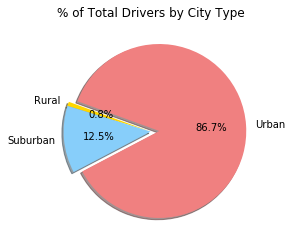

In [17]:
#identify the colors
colors=["gold","lightskyblue","lightcoral"]

# Build Pie Chart
plt.pie(total_drivers_pie, 
        autopct="%1.1f%%", 
        labels= total_drivers_pie.index, 
        colors=colors,
        startangle=160,
        shadow=True, 
        explode=(0,0,0.1))
plt.title("% of Total Drivers by City Type")
plt.show()

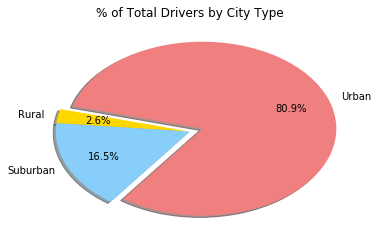

In [6]:
# Show Figure
plt.show()

In [ ]:
4 observable trends based on the data above

# Scatter Plot trend: Uber Rides are more popular in urban than suburban or rural city types.
  #Uber rides in urban cities have a lower average fare compared to those in suburban and rural cities.
    
# % of Total Fare by City Type Pie Chart Trend
#The total Uber ride fares for rural cities is marginally lower than other city types.

# % of Total Rides by City Type Chart Trend
#Urban Uber rides account for almost 70% of all Uber rides in all 3 city types.

# % of Total Drivers by City Type Chart Trend
#Almost all Uber drivers provide rides in urban cities, while it is extremely limited in rural areas.